**Author: Anmol Shinde**

**Exploratory Data Analysis**


---


Task 3- Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

We first import the required libraries.

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

After importing libraries we start with importing data.

In [3]:
data = pd.read_csv("SampleSuperstore.csv")
print("Data imported successfully")
print(data.shape)
print(data.head(10))
print(data.tail(10))

Data imported successfully
(9994, 13)
        Ship Mode    Segment        Country  ... Quantity Discount    Profit
0    Second Class   Consumer  United States  ...        2     0.00   41.9136
1    Second Class   Consumer  United States  ...        3     0.00  219.5820
2    Second Class  Corporate  United States  ...        2     0.00    6.8714
3  Standard Class   Consumer  United States  ...        5     0.45 -383.0310
4  Standard Class   Consumer  United States  ...        2     0.20    2.5164
5  Standard Class   Consumer  United States  ...        7     0.00   14.1694
6  Standard Class   Consumer  United States  ...        4     0.00    1.9656
7  Standard Class   Consumer  United States  ...        6     0.20   90.7152
8  Standard Class   Consumer  United States  ...        3     0.20    5.7825
9  Standard Class   Consumer  United States  ...        5     0.00   34.4700

[10 rows x 13 columns]
           Ship Mode    Segment        Country  ... Quantity Discount   Profit
9984  Standa

Now we gather some information about the data

In [4]:
data.info()
data.describe()
print(data.isnull().sum())
print(data.duplicated().sum())
print(data.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Qua


Now we drop some irrelevant data which is called as data cleaning.

In [5]:
col = ['Postal Code']
data1 = data.drop(columns=col, axis=1)
print(data1.shape)  # this shows that number of columns has now decrease

(9994, 12)


covarriance and correlation

In [6]:
print(data1.cov())
print(data1.corr())

                  Sales    Quantity   Discount        Profit
Sales     388434.455308  278.459923  -3.627228  69944.096586
Quantity     278.459923    4.951113   0.003961     34.534769
Discount      -3.627228    0.003961   0.042622    -10.615173
Profit     69944.096586   34.534769 -10.615173  54877.798055
             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200795 -0.028190  0.479064
Quantity  0.200795  1.000000  0.008623  0.066253
Discount -0.028190  0.008623  1.000000 -0.219487
Profit    0.479064  0.066253 -0.219487  1.000000


**Data Visualisation**

---



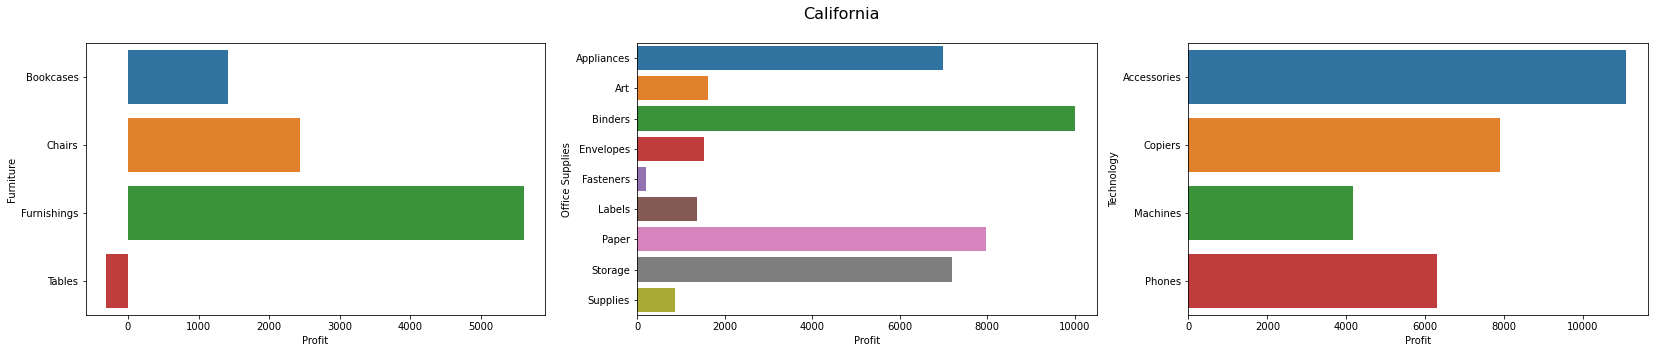

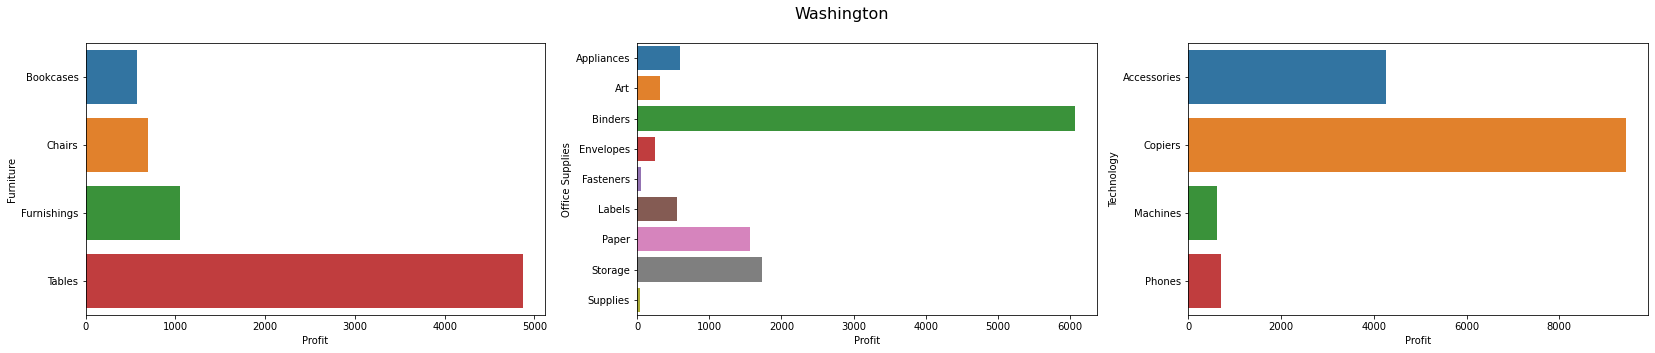

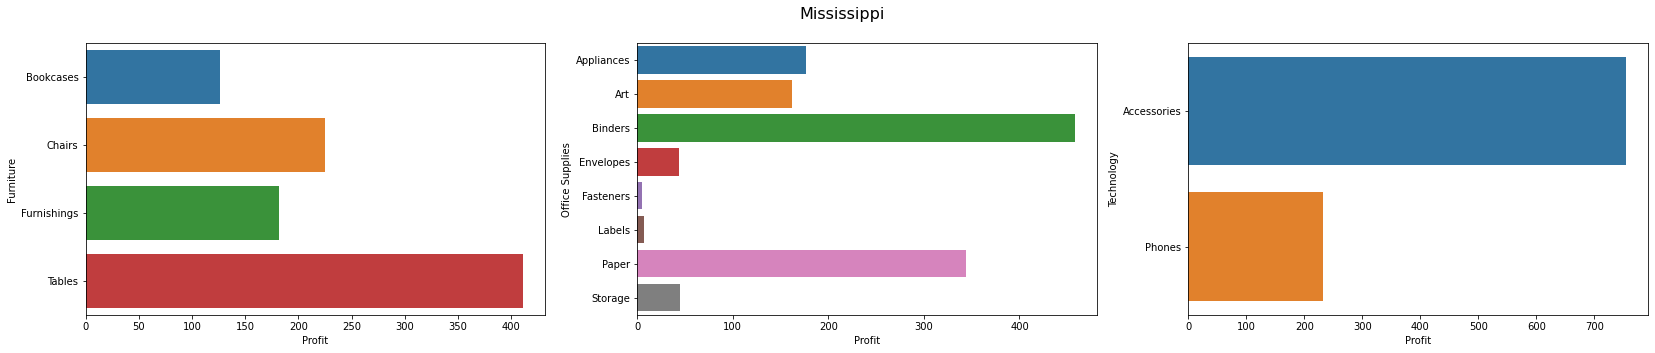

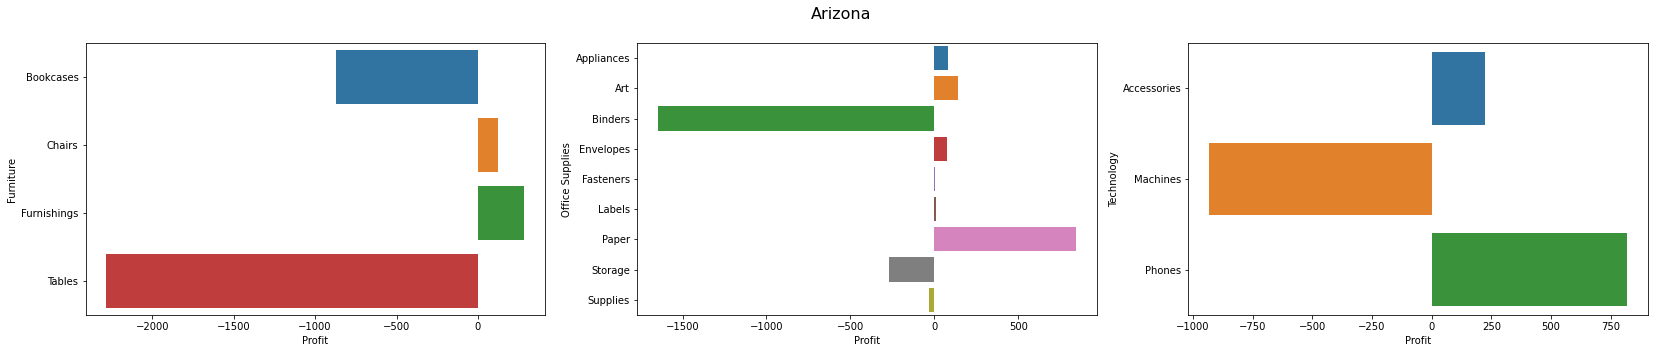

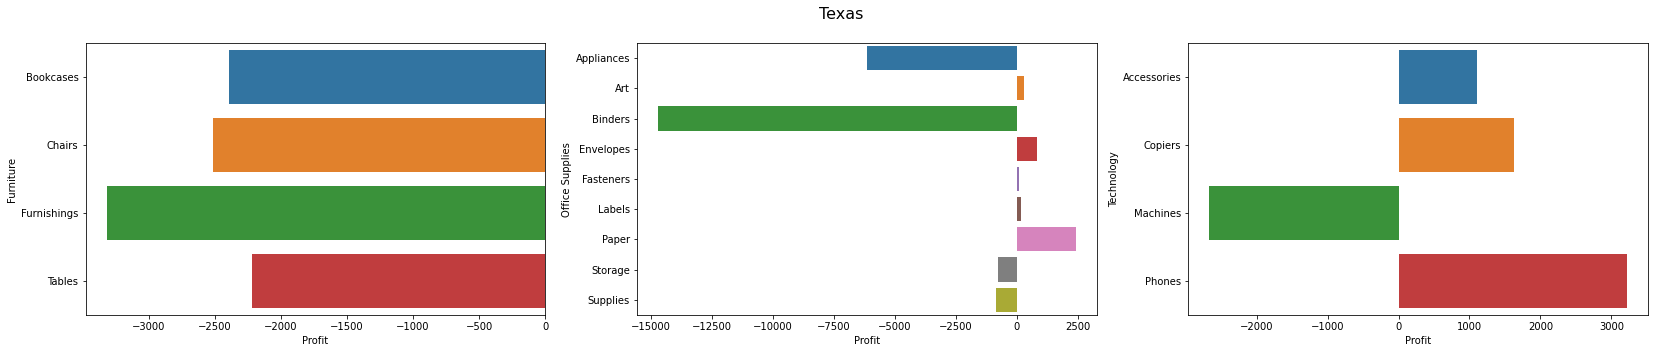

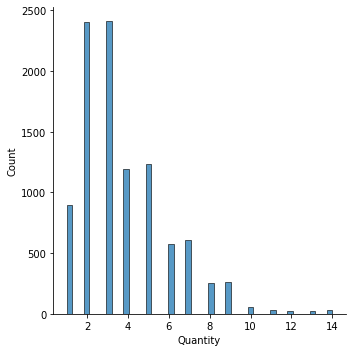

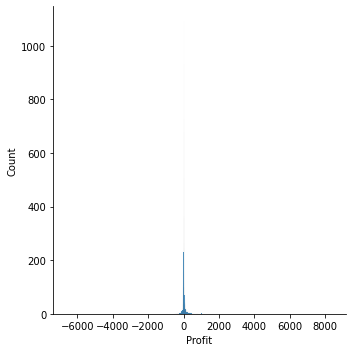

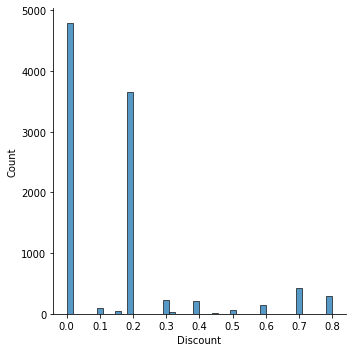

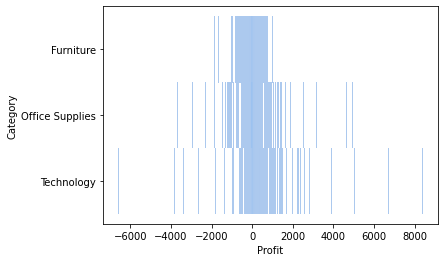

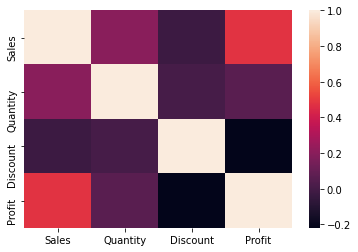

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


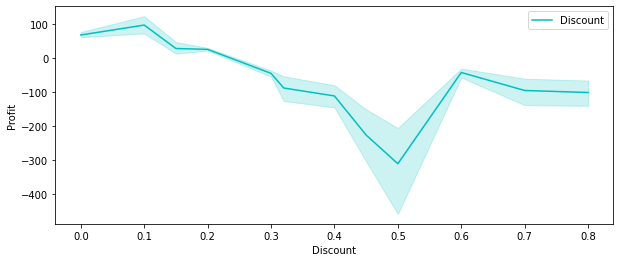

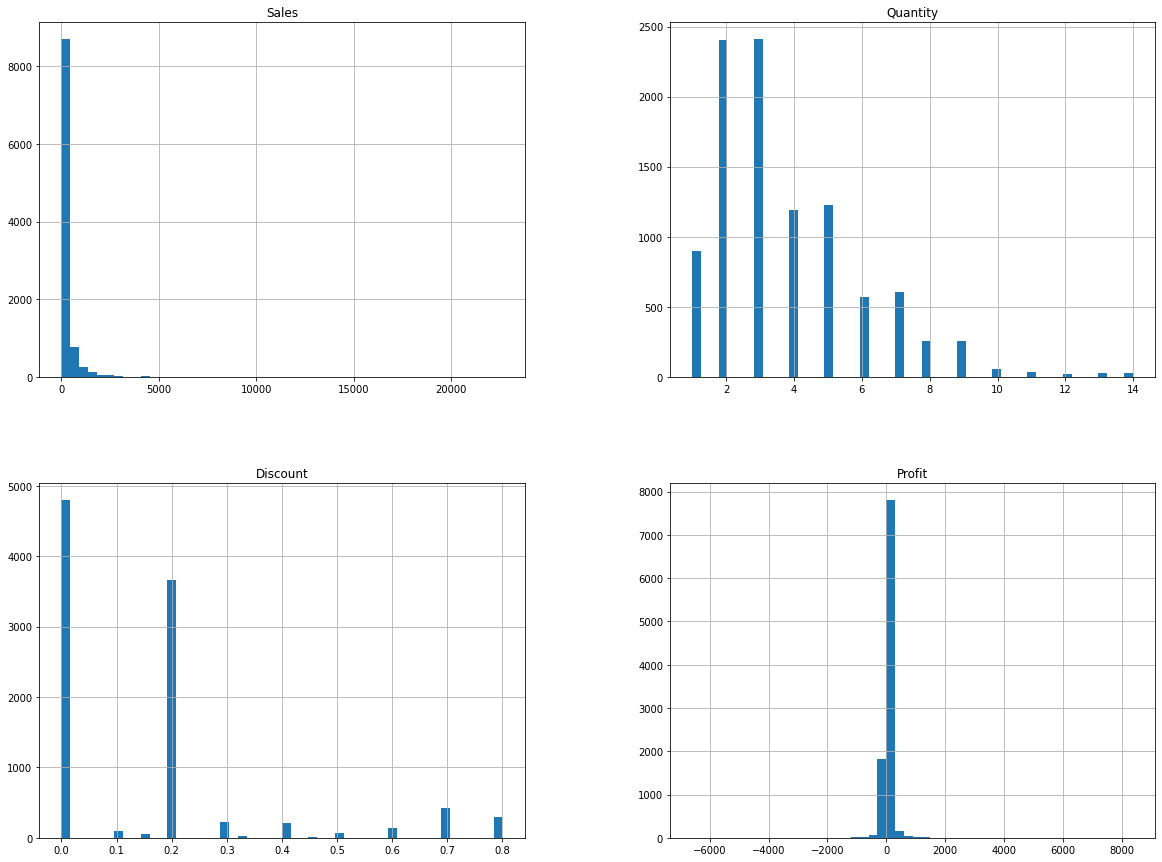

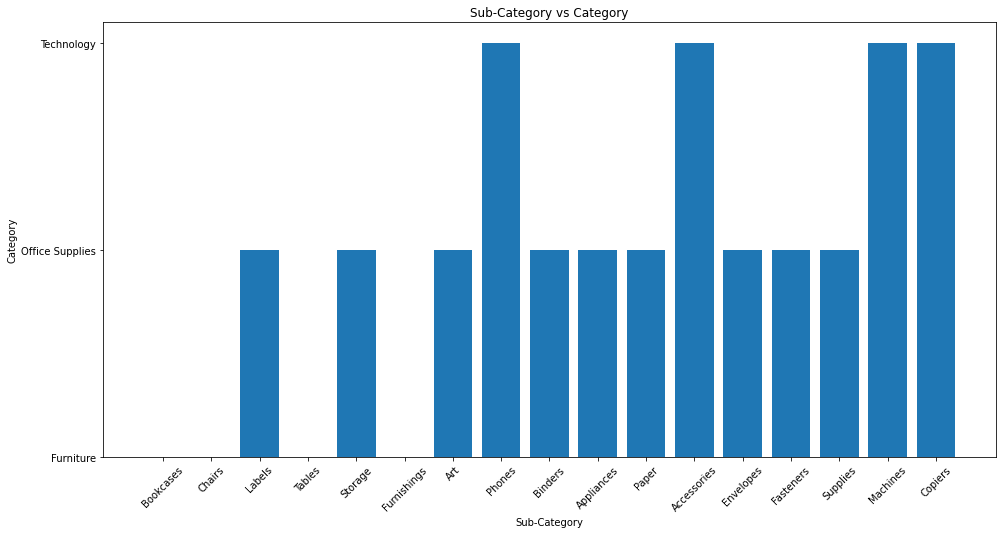

In [10]:
def state_data_viewer(states):
    product_data = data1.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize=(28, 5))
        fig.suptitle(state, fontsize=16)
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x=cat_data.Profit, y=cat_data.index, ax=ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index += 1
        fig.show()


states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas']
state_data_viewer(states)
sns.displot(data1['Quantity'])
plt.show()
sns.displot(data1['Profit'])
plt.show()
sns.displot(data1['Discount'])
plt.show()
sns.histplot(x='Profit', y='Category', data=data1)
plt.show()
t = data1.corr()
sns.heatmap(t)
plt.show()
plt.figure(figsize=(10, 4))
sns.lineplot('Discount', 'Profit', data=data1, color='c', label='Discount')
plt.legend()
plt.show()
data1.hist(bins=50, figsize=(20, 15))
plt.show()
plt.figure(figsize=(16, 8))
plt.bar('Sub-Category', 'Category', data=data1)
plt.title('Sub-Category vs Category')
plt.xlabel('Sub-Category')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()


State vs Count Plot

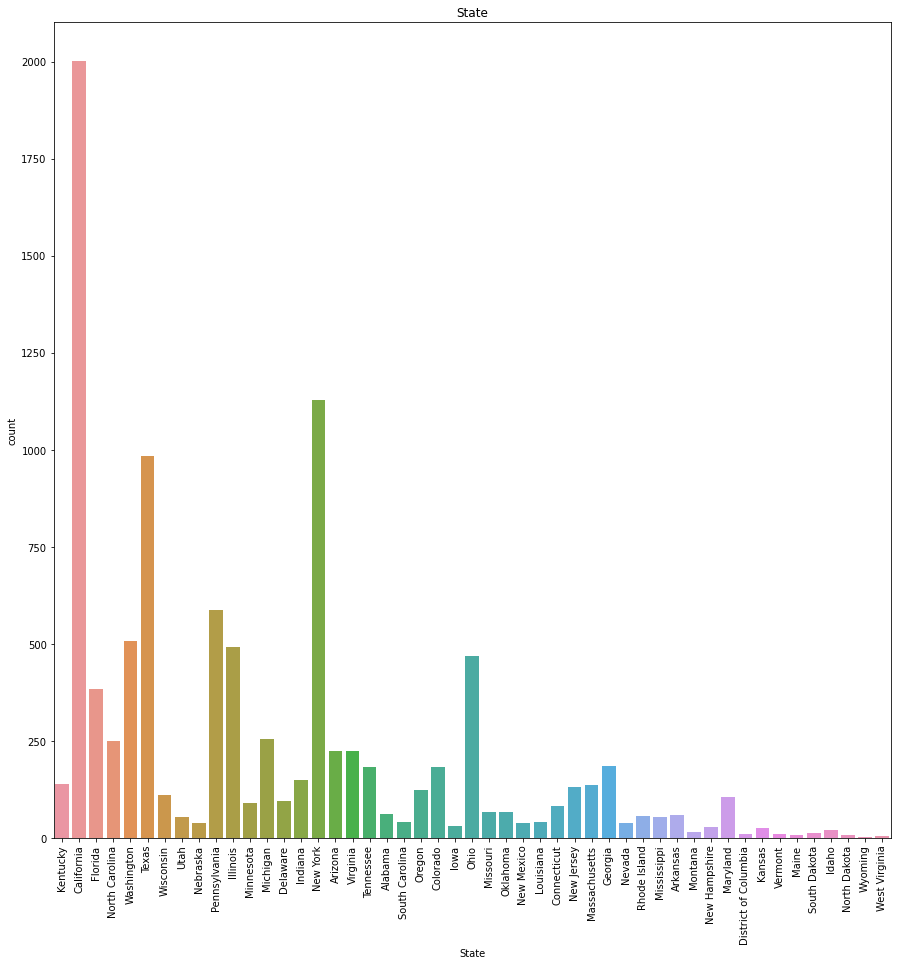

In [8]:
plt.figure(figsize=(15, 15))
sns.countplot(x=data1['State'])
plt.xticks(rotation=90)
plt.title('State')
plt.show()

Category of Products

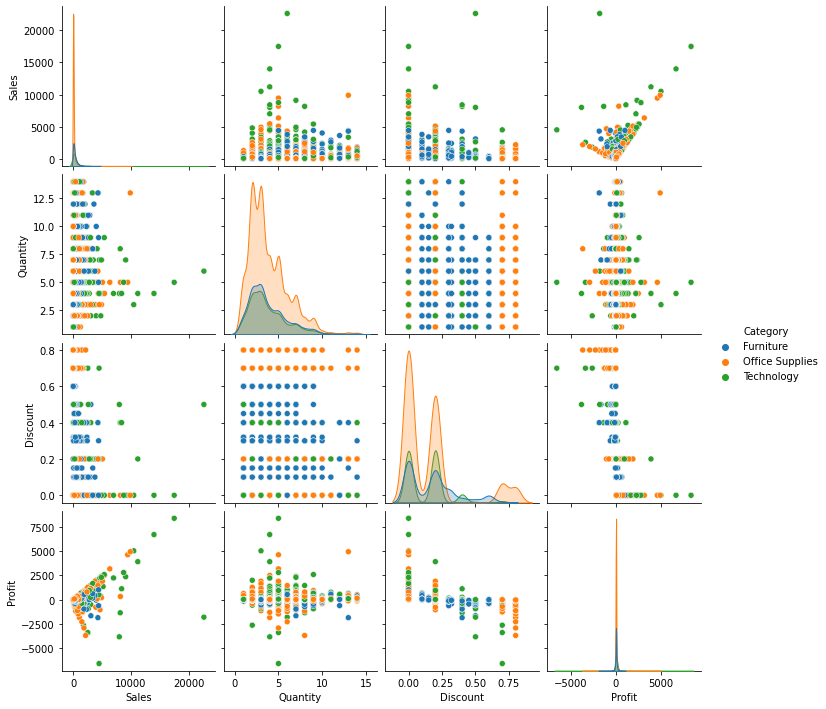

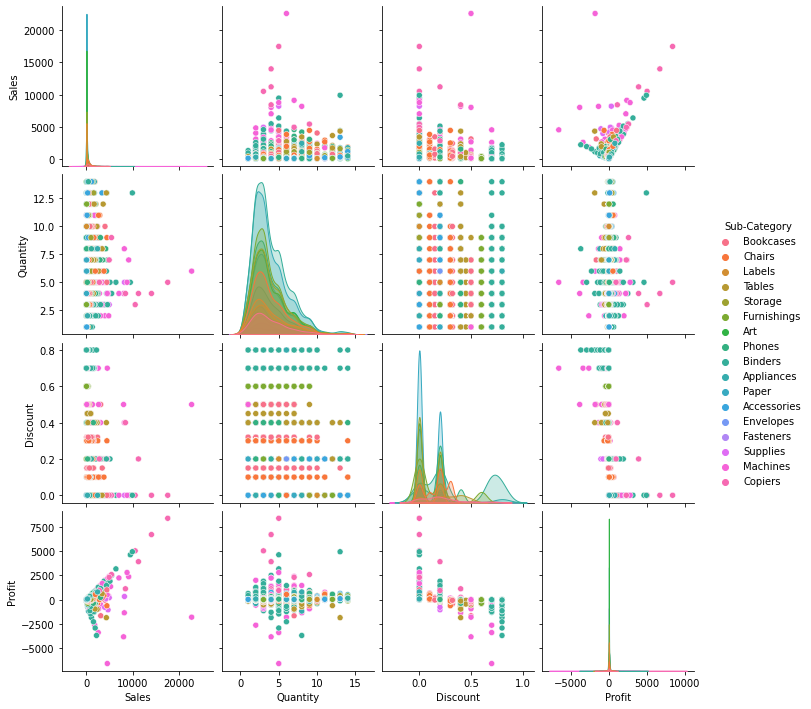

In [9]:
figsize = (15, 10)
sns.pairplot(data1, hue='Category')
plt.show()

figsize
sns.pairplot(data1, hue='Sub-Category')
plt.show()